In [1]:
from lccv import lccv
import sklearn.datasets
X, y = sklearn.datasets.load_digits(return_X_y=True)

# Evaluating a Single Learner

## Standard Usage

In [2]:
import sklearn.linear_model
import sklearn.tree
r = 0.80
score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r = r)

### Score and Score Estimate
The score estimate is only relevant if the evaluation could not be finished in the given timeout, and if an extrapolation was used. Otherwise it is equal to the score.

In [3]:
print(score, score_est)

0.8511111111111112 0.8511111111111112


### Summary of the observations on the Empirical Learning Curve

In [4]:
elc

{64: {'n': 3,
  'mean': 0.6407407407407407,
  'std': 0.022831162973959138,
  'conf': array([0.61490532, 0.66657616])},
 128: {'n': 3,
  'mean': 0.688888888888889,
  'std': 0.036004114991154794,
  'conf': array([0.64814715, 0.72963063])},
 256: {'n': 5,
  'mean': 0.7111111111111112,
  'std': 0.0376796110173626,
  'conf': array([0.67808408, 0.74413814])},
 512: {'n': 4,
  'mean': 0.7847222222222221,
  'std': 0.033420026154211,
  'conf': array([0.7519712 , 0.81747325])},
 1024: {'n': 3,
  'mean': 0.8037037037037037,
  'std': 0.015930231976004856,
  'conf': array([0.78567728, 0.82173013])},
 1617: {'n': 10,
  'mean': 0.8511111111111112,
  'std': 0.0359869660904481,
  'conf': array([0.82880657, 0.87341565])}}

### Detailed Observations Made on the Empirical Learning Curve

In [5]:
model.df

,anchor,seed,fittime,scoretime_train_accuracy,score_train_accuracy,scoretime_test_accuracy,score_test_accuracy
0,64,13,0.001216,0.000409,1.0,0.000545,0.666667
1,64,14,0.001033,0.000370,1.0,0.000428,0.644444
2,64,15,0.000941,0.000395,1.0,0.000470,0.611111
3,128,13,0.001590,0.000378,1.0,0.000448,0.672222
4,128,14,0.001416,0.000375,1.0,0.000412,0.655556
5,128,15,0.001478,0.000382,1.0,0.000499,0.738889
6,256,13,0.002667,0.000447,1.0,0.000503,0.777778
7,256,14,0.002780,0.000435,1.0,0.000482,0.683333
8,256,15,0.002808,0.000450,1.0,0.000480,0.677778
9,256,16,0.002655,0.000431,1.0,0.000483,0.688889


## Changing the Portion of Validation Data
The validation data is simply the number of datapoints that exceeds the highest anchor point. So changing that portion is equivalent to changing the highest anchor point.

In [6]:
r = 0.95
target_anchor = 0.9 # relative anchor
score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r = r, target_anchor = target_anchor)
print(score, elc) ## the model performance at 90% is only 0.84. Since r = 0.95, the candidate is pruned early.

target_anchor = 1500 # absolute anchor
score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r = r, target_anchor = target_anchor)
print(score, elc) ## in this scenario, LCCV cannot prune the candidate early.

nan {64: {'n': 3, 'mean': 0.6407407407407407, 'std': 0.022831162973959138, 'conf': array([0.61490532, 0.66657616])}, 128: {'n': 3, 'mean': 0.688888888888889, 'std': 0.036004114991154794, 'conf': array([0.64814715, 0.72963063])}, 256: {'n': 5, 'mean': 0.7111111111111112, 'std': 0.0376796110173626, 'conf': array([0.67808408, 0.74413814])}, 512: {'n': 4, 'mean': 0.7847222222222221, 'std': 0.033420026154211, 'conf': array([0.7519712 , 0.81747325])}, 1024: {'n': 3, 'mean': 0.8037037037037037, 'std': 0.015930231976004856, 'conf': array([0.78567728, 0.82173013])}}
0.8454545454545455 {64: {'n': 3, 'mean': 0.5476992143658811, 'std': 0.04199391006480293, 'conf': array([0.5001795 , 0.59521892])}, 128: {'n': 3, 'mean': 0.6475869809203143, 'std': 0.04199391006480293, 'conf': array([0.60006727, 0.69510669])}, 256: {'n': 3, 'mean': 0.7250280583613917, 'std': 0.014107525353509042, 'conf': array([0.70906418, 0.74099193])}, 512: {'n': 4, 'mean': 0.8021885521885522, 'std': 0.030338082981380663, 'conf': a

## Setting a Timeout

In [7]:
r = 0.95
target_anchor = 0.9 # relative anchor
score, score_est, elc, model = lccv(sklearn.linear_model.LogisticRegression(max_iter = 10**4), X, y, timeout = 2, r = r)
print(score, elc) ## LCCV cannot evaluate the learner within 2 seconds. It hence returns the score of the last anchor that could be evaluated successfully.

0.8722222222222222 {64: {'n': 3, 'mean': 0.862962962962963, 'std': 0.030202789685740937, 'conf': array([0.82878592, 0.89714001])}, 128: {'n': 1, 'mean': 0.8722222222222222, 'std': 0.0, 'conf': array([0.87222222, 0.87222222])}}


## Customized Scoring

In [8]:
scoring = "neg_log_loss"
score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r=-1, base_scoring=scoring)
print(score, elc)  ## returns nan, because a score of -1 cannot be reached

score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r=-2, base_scoring=scoring)
print(score, elc)  ## returns the final score, because for r = -2, no pruning was possible

nan {64: {'n': 10, 'mean': -16.139547017571353, 'std': 2.4593172808209007, 'conf': array([-17.66381965, -14.61527438])}, 128: {'n': 10, 'mean': -13.276078998324824, 'std': 2.2244952141672196, 'conf': array([-14.65481008, -11.89734792])}, 256: {'n': 10, 'mean': -10.412610979078291, 'std': 1.3038848158876437, 'conf': array([-11.22075231,  -9.60446965])}, 512: {'n': 10, 'mean': -7.909579493722935, 'std': 1.3793497736808666, 'conf': array([-8.76449363, -7.05466536])}, 1024: {'n': 10, 'mean': -5.947202809204332, 'std': 1.0559826774636114, 'conf': array([-6.60169563, -5.29270999])}}
-5.566742023430318 {64: {'n': 10, 'mean': -16.139547017571353, 'std': 2.4593172808209007, 'conf': array([-17.66381965, -14.61527438])}, 128: {'n': 10, 'mean': -13.276078998324824, 'std': 2.2244952141672196, 'conf': array([-14.65481008, -11.89734792])}, 256: {'n': 10, 'mean': -10.412610979078291, 'std': 1.3038848158876437, 'conf': array([-11.22075231,  -9.60446965])}, 512: {'n': 10, 'mean': -7.909579493722935, 'st

## Customized Evaluator
By default, LCCV conducts repeated hold-out evaluations at each anchor.
Alternatively, you can provide an evaluator that returns train and test performance and, *optionally*, the (simulated) time for the evaluation.
This function is particularly useful if you want to simulate the behavior of LCCV in a context with pre-computed results.

If you provide an evaluator, the data will be *ignored*. It is hence sensible to leave them blank (`None`) altogether.
Since in that case, no maximum anchor point can be inferred automatically, you must provide the `target_anchor` parameter with an *absolute* value.

In the following, we provide data from a synthetic learning curve created with a 3-parametric inverse power law.

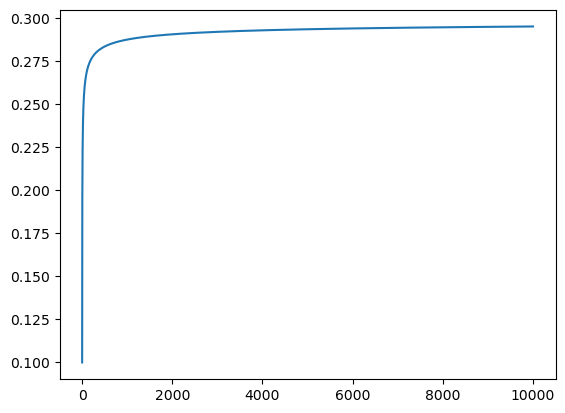

In [9]:
import numpy as np
import matplotlib.pyplot as plt
ipl = lambda x: -0.2 * x **-0.4 + 0.3
domain = np.arange(1, 10**4)
fig, ax = plt.subplots()
ax.plot(domain, ipl(domain))
plt.show()

## Deactivating Usage of the Training Curve
LCCV assumes that the learning curve on the training data is always better than the curve created from validation data.
In some rare cases (decision trees with high number of required instances per leaf), this is not so.
If you know that you are in such a situation, you should *disable* the usage of train curves for pruning.

To simulate this effect, we re-use the IPL model from above:

In [10]:
def evaluator_anomal_learning_curves(learner, anchor, timeout, base_scoring, additional_scorings):
    results = {
        "fittime": 0,
    }
    for scoring_name, scoring_fun in [base_scoring] + additional_scorings:
        results.update({
            f"scoretime_train_{scoring_name}": 0,
            f"scoretime_test_{scoring_name}": 0,
            f"score_train_{scoring_name}": ipl(anchor) - 0.01,
            f"score_test_{scoring_name}": ipl(anchor)
        })
    return results

scoring = ("dummy", lambda l, x, y: None)

score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), None, None, r = 0.29, evaluator = evaluator_anomal_learning_curves, target_anchor = 1500, base_scoring=scoring)
print(f"Initial training performance: {model.df.query('anchor == 64')[f'score_train_{scoring[0]}'].mean()}")
print(score, elc) ## the model is pruned right away since the initial *training* score (0.25) is already worse than r

score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), None, None, r = 0.29, evaluator = evaluator_anomal_learning_curves, target_anchor = 1500, use_train_curve = False, base_scoring=scoring)
print(f"Initial training performance: {model.df.query('anchor == 64')[f'score_train_{scoring[0]}'].mean()}")
print(score, elc) ## without this flag, the curve is computed completely

Initial training performance: 0.25210708583724
nan {64: {'n': 3, 'mean': 0.26210708583724, 'std': 0.0, 'conf': array([0.26210709, 0.26210709])}}
Initial training performance: 0.25210708583724
nan {64: {'n': 3, 'mean': 0.26210708583724, 'std': 0.0, 'conf': array([0.26210709, 0.26210709])}, 128: {'n': 3, 'mean': 0.2712825411250741, 'std': 0.0, 'conf': array([0.27128254, 0.27128254])}, 256: {'n': 5, 'mean': 0.2782362359175969, 'std': 0.0, 'conf': array([0.27823624, 0.27823624])}, 512: {'n': 4, 'mean': 0.28350615111533883, 'std': 0.0, 'conf': array([0.28350615, 0.28350615])}, 1024: {'n': 3, 'mean': 0.2875, 'std': 0.0, 'conf': array([0.2875, 0.2875])}, 1500: {'n': 3, 'mean': 0.2892701539200023, 'std': 0.0, 'conf': array([0.28927015, 0.28927015])}}


## Customizing Logs
LCCV uses two different names for logging:
* `lccv` is for all topics directly related to the logic of the cross validation
* `elm` is for the logic applied inside the learning curve model, which *also includes the acquisition of new data points* and hence the evaluation of learners.

In [11]:
import logging
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)

# configure lccv logger (by default set to WARN, change it to DEBUG if tests fail)
lccv_logger = logging.getLogger("lccv")
lccv_logger.handlers.clear()
lccv_logger.setLevel(logging.INFO)
lccv_logger.addHandler(ch)
elm_logger = logging.getLogger("elm")
elm_logger.handlers.clear()
elm_logger.setLevel(logging.WARN)
elm_logger.addHandler(ch)

In [12]:
r = 0.80
score, score_est, elc, model = lccv(sklearn.tree.DecisionTreeClassifier(), X, y, r = r)

2023-08-22 22:58:06,116 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: DecisionTreeClassifier()
    r: 0.8
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:58:06,122 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:58:06,154 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 3, 'mean': 0.6407, 'std': 0.0228, 'conf': array([0.6149, 0.6666])}.
2023-08-22 22:58:06,163 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:58:06,189 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 3, 'mean': 0.6889, 'std': 0.036, 'conf': array([0.6481, 0.7296])}.
2023-08-22 22:58:06,201 - lccv - INFO - Running iteration for t = 2. Anchor point s_t is 256. Remaining time: infs
2023-08-22 22:58:06,242 - lccv - INFO - Finished schedule on 25

# Using LCCV inside an AutoML Tool

If an AutoML tool offers a custom evaluation function, LCCV can be plugged in with a wrapper class, which must be customized towards the respective AutoML tool.

## Naive AutoML

In [ ]:
!pip install naiveautoml

In [17]:
import naiveautoml

class Wrapper:
    
    def __init__(self):
        self.r = -np.inf
    
    def evaluate(self, learner, X, y, scorings): # this signature is dicated by the AutoML tool
        
        score, _, _, elcm = lccv(
            learner,
            X,
            y,
            r=self.r,
            base_scoring=scorings[0],
            additional_scorings=scorings[1:]
        )
        if not np.isnan(score) and score > self.r:
            self.r = score
        
        results_at_highest_anchor = elcm.df[elcm.df["anchor"] == np.max(elcm.df["anchor"])].mean(numeric_only=True)
        results = {
            s: results_at_highest_anchor[f"score_test_{s}"] if not np.isnan(score) else np.nan for s in scorings
        }
        return results

wrapper = Wrapper()
naml = naiveautoml.NaiveAutoML(max_hpo_iterations=10, evaluation_fun = wrapper.evaluate)

In [18]:
naml.fit(X, y)

2023-08-22 22:58:25,775 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', BernoulliNB())])
    r: -inf
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:58:25,778 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn

2023-08-22 22:58:26,564 - lccv - INFO - Finished schedule on 256, and t is now 3. Performance: {'n': 10, 'mean': -10.4126, 'std': 1.3039, 'conf': array([-11.2208,  -9.6045])}.
2023-08-22 22:58:26,584 - lccv - INFO - Running iteration for t = 3. Anchor point s_t is 512. Remaining time: infs
2023-08-22 22:58:26,745 - lccv - INFO - Finished schedule on 512, and t is now 4. Performance: {'n': 10, 'mean': -7.9096, 'std': 1.3793, 'conf': array([-8.7645, -7.0547])}.
2023-08-22 22:58:26,774 - lccv - INFO - Running iteration for t = 4. Anchor point s_t is 1024. Remaining time: infs
2023-08-22 22:58:27,050 - lccv - INFO - Impossibly reachable. Best possible score by bound is -1.2716793306326597. Stopping after anchor s_t = 1024 and returning nan.
2023-08-22 22:58:27,064 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', ExtraTreesClassifier())])
    r: -0.707117358946192
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 

2023-08-22 22:58:41,648 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:58:41,791 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -22.1413, 'std': 3.7543, 'conf': array([-24.4683, -19.8144])}.
2023-08-22 22:58:41,801 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:58:41,953 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -2.8488, 'std': 0.6664, 'conf': array([-3.2618, -2.4358])}.
2023-08-22 22:58:41,969 - lccv - INFO - Running iteration for t = 2. Anchor point s_t is 256. Remaining time: infs
2023-08-22 22:58:42,145 - lccv - INFO - Finished schedule on 256, and t is now 3. Performance: {'n': 10, 'mean': -0.7519, 'std': 0.3324, 'conf': array([-0.9579, -0.5459])}.
2023-08-22 22:58:42,168 - lccv - INFO - Running iteration for t = 3. Anchor point s_t is 512. Remaining time: infs
2023-08-22 22:58:42,

/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
2023-08-22 22:58:46,398 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -0.5519, 'std': 0.1045, 'conf': array([-0.6167, -0.4871])}.
2023-08-22 22:58:46,415 - lccv - INFO - Running iteration for t = 2. Anchor point s_t is 256. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
2023-08-22 22:58:49,271 - lccv - INFO - Finished schedule on 256, and t is now 3. Performance: {'n': 10, 'mean': -0.3204, 'std': 0.1074, 'conf': array([-0.387 , -0.2539])}.
2023-08-22 22:58:49,300 - lccv - INFO - Running iteration for t = 3. Anchor point s_t is 512.

2023-08-22 22:58:53,982 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:58:55,531 - lccv - INFO - Train curve has value -0.26413402712551004 that is already worse than r = -0.1921033890698897. Stopping.
2023-08-22 22:58:55,541 - lccv - INFO - 
		64:	n: 10, mean: -1.1254, std: 0.0823, conf: [-1.1764 -1.0744]. Avg. runtime: fittime                         0.1
scoretime_train_neg_log_loss    0.0
scoretime_test_neg_log_loss     0.0
dtype: float64
2023-08-22 22:58:55,542 - lccv - INFO - Observed no result or a train performance that is worse than r. In either case, returning nan.
2023-08-22 22:58:55,550 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', LinearDiscriminantAnalysis())])
    r: -0.1921033890698897
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:58:55,551 - lccv - INFO - Running iterat

2023-08-22 22:58:58,539 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:58:58,701 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -20.7803, 'std': 3.5163, 'conf': array([-22.9597, -18.601 ])}.
2023-08-22 22:58:58,712 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:58:58,862 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -2.8081, 'std': 0.5862, 'conf': array([-3.1715, -2.4448])}.
2023-08-22 22:58:58,877 - lccv - INFO - Running iteration for t = 2. Anchor point s_t is 256. Remaining time: infs
2023-08-22 22:58:59,047 - lccv - INFO - Finished schedule on 256, and t is now 3. Performance: {'n': 10, 'mean': -0.7438, 'std': 0.3391, 'conf': array([-0.9539, -0.5336])}.
2023-08-22 22:58:59,076 - lccv - INFO - Running iteration for t = 3. Anchor point s_t is 512. Remaining time: infs
2023-08-22 22:58:59,

/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
2023-08-22 22:59:10,421 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -24.0056, 'std': 4.4891, 'conf': array([-26.7879, -21.2233])}.
2023-08-22 22

2023-08-22 22:59:12,415 - lccv - INFO - Finished schedule on 512, and t is now 4. Performance: {'n': 10, 'mean': -0.369, 'std': 0.0893, 'conf': array([-0.4244, -0.3137])}.
2023-08-22 22:59:12,449 - lccv - INFO - Running iteration for t = 4. Anchor point s_t is 1024. Remaining time: infs
2023-08-22 22:59:14,281 - lccv - INFO - Finished schedule on 1024, and t is now 5. Performance: {'n': 10, 'mean': -0.2991, 'std': 0.128, 'conf': array([-0.3785, -0.2198])}.
2023-08-22 22:59:14,282 - lccv - INFO - Running iteration for t = 5. Anchor point s_t is 1617. Remaining time: infs
2023-08-22 22:59:17,373 - lccv - INFO - Last iteration has been finished. Not testing anything else anymore.
2023-08-22 22:59:17,402 - lccv - INFO - 
		64:	n: 10, mean: -24.0056, std: 4.4891, conf: [-26.7879 -21.2233]. Avg. runtime: fittime                         0.0
scoretime_train_neg_log_loss    0.0
scoretime_test_neg_log_loss     0.0
dtype: float64Learning Curve Construction Completed. Summary:
    Runtime: 7301ms.

2023-08-22 22:59:21,570 - lccv - INFO - Target performance: -0.19210338906988952
2023-08-22 22:59:21,584 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('data-pre-processor', VarianceThreshold()), ('learner', LinearDiscriminantAnalysis())])
    r: -0.19210338906988952
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:59:21,589 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:59:21,750 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -22.1413, 'std': 3.7543, 'conf': array([-24.4683, -19.8144])}.
2023-08-22 22:59:21,763 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:59:21,936 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -2.8488, 'std': 0.6664, 'conf': array([-3.2618, 

/env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  

2023-08-22 22:59:36,344 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('feature-pre-processor', Nystroem()), ('learner', LinearDiscriminantAnalysis())])
    r: -0.19210338906984634
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:59:36,346 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/kernel_approximation.py:1044: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/kernel_approximation.py:1044: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/kernel

2023-08-22 22:59:46,980 - lccv - INFO - 
		64:	n: 10, mean: -2.8866, std: 1.4552, conf: [-3.7886 -1.9847]. Avg. runtime: fittime                         0.0
scoretime_train_neg_log_loss    0.0
scoretime_test_neg_log_loss     0.0
dtype: float64
2023-08-22 22:59:46,982 - lccv - INFO - Observed no result or a train performance that is worse than r. In either case, returning nan.
2023-08-22 22:59:46,991 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('feature-pre-processor', GenericUnivariateSelect()), ('learner', LinearDiscriminantAnalysis())])
    r: -0.19210338906984634
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:59:46,992 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  7  8 16 23 24 31 32 39 40 4

2023-08-22 22:59:48,680 - lccv - INFO - Target performance: -0.1921033890698897
2023-08-22 22:59:48,695 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.0006519335438666459))])
    r: -0.19210338906984634
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:59:48,699 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:327: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/env/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:95: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
2023-08-22 22:59:49,007 - lccv - INFO - Finished schedule on 64, and t is now 1. Pe

2023-08-22 22:59:53,501 - lccv - INFO - Target performance: -0.1921033890698897
2023-08-22 22:59:53,518 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', LinearDiscriminantAnalysis(tol=5.3136622481251604e-05))])
    r: -0.19210338906984634
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 22:59:53,520 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 22:59:53,664 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -22.1413, 'std': 3.7543, 'conf': array([-24.4683, -19.8144])}.
2023-08-22 22:59:53,677 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:59:53,829 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -2.8488, 'std': 0.6664, 'conf': array([-3.2618, -2.4358])}.
2023-08-

2023-08-22 22:59:56,963 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
/env/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:95: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
2023-08-22 22:59:57,162 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -2.4696, 'std': 1.0572, 'conf': array([-3.1248, -1.8143])}.
2023-08-22 22:59:57,176 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 22:59:57,381 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -0.8713, 'std': 0.2769, 'conf': array([-1.0429, -0.6997])}.
2023-08-22 22:59:57,397 - lccv - INFO - Running iteration for t = 2. Anchor point s_t is 256. Remaining time: infs
2023-08-22 22:59:57,618 - lccv - INFO - Finished schedule on 256, and t is now 3. Performance: {'n': 10, 'mean': -0.5411, 'std': 0.2

2023-08-22 23:00:01,179 - lccv - INFO - Target performance: -0.22406471745893883
2023-08-22 23:00:01,194 - lccv - INFO - Running LCCV on (1797, 64)-shaped data. Overview:
    learner: Pipeline(steps=[('learner', LinearDiscriminantAnalysis(tol=0.00012702407149908695))])
    r: -0.19210338906984634
    min_exp: 6
    max_exp: 10.659103963473662
    Seed is 0
    t_0: 0
    Schedule: [64, 128, 256, 512, 1024, 1617]
2023-08-22 23:00:01,196 - lccv - INFO - Running iteration for t = 0. Anchor point s_t is 64. Remaining time: infs
2023-08-22 23:00:01,361 - lccv - INFO - Finished schedule on 64, and t is now 1. Performance: {'n': 10, 'mean': -22.1413, 'std': 3.7543, 'conf': array([-24.4683, -19.8144])}.
2023-08-22 23:00:01,377 - lccv - INFO - Running iteration for t = 1. Anchor point s_t is 128. Remaining time: infs
2023-08-22 23:00:01,529 - lccv - INFO - Finished schedule on 128, and t is now 2. Performance: {'n': 10, 'mean': -2.8488, 'std': 0.6664, 'conf': array([-3.2618, -2.4358])}.
2023-08

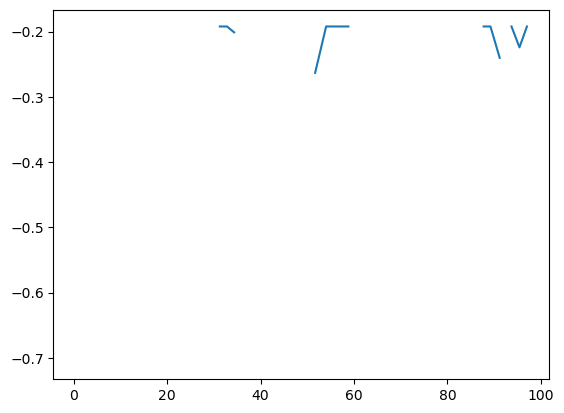

Pipeline(steps=[('learner', LinearDiscriminantAnalysis())])


In [19]:
fig, ax = plt.subplots()
times = naml.history["time"]
scores = naml.history["neg_log_loss"]
ax.plot(times, scores)
plt.show()
print(naml.chosen_model)